In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn import linear_model
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def linear_regression(time,prop):
    """
    Linear regression time vs properties
    (could be area,orientation,compactness)
    
    """
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    
    # reshape required for LinearRegression
    time=time.reshape(-1, 1)
    
    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(time, prop)
    
    # Make predictions using the testing set
    prop_predict = regr.predict(time)
    
    
    #     # The coefficients
    #     print('Coefficients: \n', regr.coef_)
    #     # The mean squared error
    #     print('Mean squared error: %.2f'% mean_squared_error(area, area_predict))
    #     # The coefficient of determination: 1 is perfect prediction
    #     print('Coefficient of determination: %.2f'% r2_score(area,area_predict))

    # Plot outputs
    result={"slope":regr.coef_[0], 
                   "intersept":regr.intercept_,
                   "MAE":mean_absolute_error(prop,prop_predict),
                   "R2":r2_score(prop,prop_predict)}
    
    return result,prop_predict

### Cels in 5ul

In [8]:
Cels_in_5ul=pd.DataFrame()

time_hours_cells_5May=[12,13,14,15,16,18]
cells_5May=[66,220,121,350,914,2093]
Cels_in_5ul=pd.DataFrame({'time_hour':time_hours_cells_5May,'cells_count':cells_5May})
Cels_in_5ul['experiment']='5May'


time_hours_cells_4May=[12,13,14,15,16,17]
cells_4May=[34,35,97,252,648,715]
df_4May=pd.DataFrame({'time_hour':time_hours_cells_4May,'cells_count':cells_4May})
df_4May['experiment']='4May'
Cels_in_5ul=pd.concat([Cels_in_5ul,df_4May])


time_hours_cells_7May=[13,14,15,16,17,18]
cells_7May=[40,140,200,930,1480,3000]
df_7May=pd.DataFrame({'time_hour':time_hours_cells_7May,'cells_count':cells_7May})
df_7May['experiment']='7May'
Cels_in_5ul=pd.concat([Cels_in_5ul,df_7May])


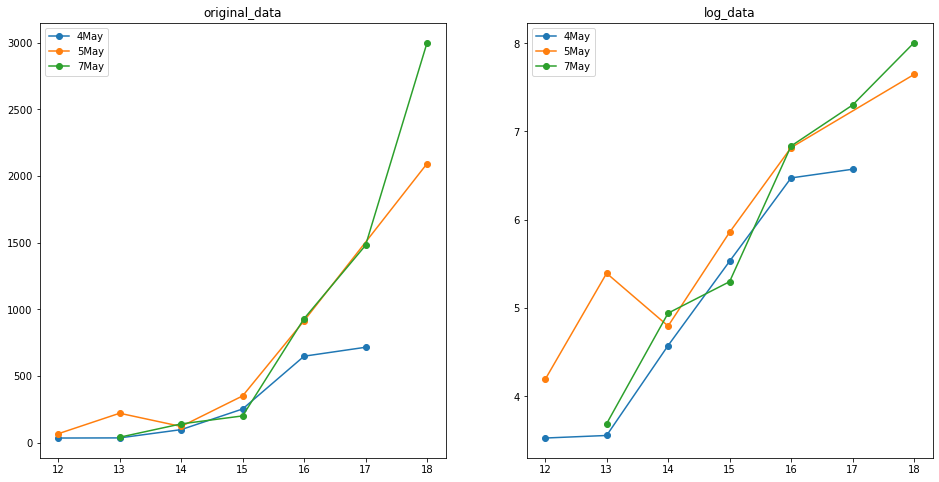

In [19]:
result_fit=[]
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax[0].set_title("original_data")
ax[1].set_title("log_data")

for id, group in  Cels_in_5ul.groupby("experiment"):
    x=group['cells_count'].values
    t=group['time_hour'].values
    result,predict=linear_regression(t,np.log(x+1e-6))
    result["file_prefix"]=id
          
    result_fit.append(result)
    ax[0].plot(t,x,'-o',label=id)
    ax[1].plot(t,np.log(x+1e-6),'-o',label=id)
    ax[0].legend()
    ax[1].legend()

In [20]:
result_fit=pd.DataFrame(result_fit)
result_fit['doubling_time_hour']=np.log2(2)/result_fit.slope
result_fit['doubling_time_min']=np.log2(2)/result_fit.slope*60
result_fit

slope  intersept       MAE        R2 file_prefix  doubling_time_hour  \
0  0.712570  -5.293597  0.256651  0.949812        4May            1.403371   
1  0.564512  -2.495977  0.277522  0.905303        5May            1.771442   
2  0.862822  -7.362044  0.205418  0.974758        7May            1.158988   

   doubling_time_min  
0          84.202234  
1         106.286503  
2          69.539250

### Cels per ml

In [22]:
Cels_per_ml=pd.DataFrame()
time_hours_cells_5May=[12,13,14,15,16,18]
cells_5May=[13200,44000,24200,70000,182800,418600]
df_5May=pd.DataFrame({'time_hour':time_hours_cells_5May,'cells_count':cells_5May})
df_5May['experiment']='5May'
Cels_per_ml=pd.concat([Cels_per_ml,df_5May])


time_hours_cells_4May=[12,13,14,15,16,17]
cells_4May=[6800,7000,19400,50400,129600,143000]
df_4May=pd.DataFrame({'time_hour':time_hours_cells_4May,'cells_count':cells_4May})
df_4May['experiment']='4May'
Cels_per_ml=pd.concat([Cels_per_ml,df_4May])


time_hours_cells_7May=[13,14,15,16,17,18]
cells_7May=[8000,28000,40000,186000,296000,600000]
df_7May=pd.DataFrame({'time_hour':time_hours_cells_7May,'cells_count':cells_7May})
df_7May['experiment']='7May'
Cels_per_ml=pd.concat([Cels_per_ml,df_7May])

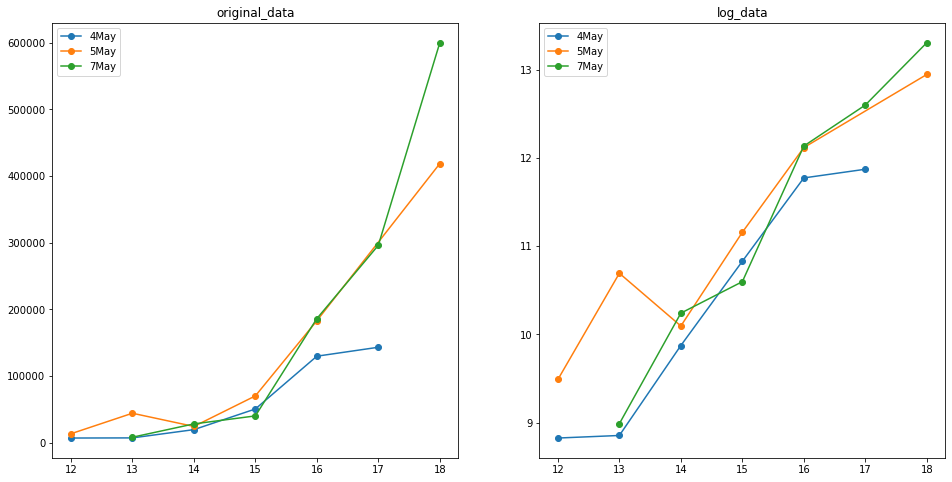

In [23]:
result_fit=[]
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax[0].set_title("original_data")
ax[1].set_title("log_data")

for id, group in  Cels_per_ml.groupby("experiment"):
    x=group['cells_count'].values
    t=group['time_hour'].values
    result,predict=linear_regression(t,np.log(x+1e-6))
    result["file_prefix"]=id
          
    result_fit.append(result)
    ax[0].plot(t,x,'-o',label=id)
    ax[1].plot(t,np.log(x+1e-6),'-o',label=id)
    ax[0].legend()
    ax[1].legend()

In [24]:
result_fit=pd.DataFrame(result_fit)
result_fit['doubling_time_hour']=np.log2(2)/result_fit.slope
result_fit['doubling_time_min']=np.log2(2)/result_fit.slope*60
result_fit

slope  intersept       MAE        R2 file_prefix  doubling_time_hour  \
0  0.712570   0.004720  0.256651  0.949812        4May            1.403371   
1  0.564512   2.802341  0.277522  0.905303        5May            1.771442   
2  0.862822  -2.063727  0.205418  0.974758        7May            1.158988   

   doubling_time_min  
0          84.202233  
1         106.286503  
2          69.539250